**Code for understanding this file:**
- <font color=blue>Questions are put in blue <font color=black> 
- Answers are put in black

Before starting these exercises we have imported some libraries:

In [340]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Probability practice

## Part (a):

<font color=blue>
Visitors to your website are asked to answer a single survey question before they get access to the content on the page. Among all of the users, there are two categories: Random Clicker (RC), and Truthful Clicker (TC). There are two possible answers to the survey: yes and no. Random clickers would click either one with equal probability. You are also giving the information that the expected fraction of random clickers is 0.3. After a trial period, you get the following survey results: 65% said Yes and 35% said No. What fraction of people who are truthful clickers answered yes? Hint: use the rule of total probability.

- P(YES|RC) = 0.50
- P(NO|RC) = 0.50
- P(RC) = 0.30
- P(YES) = 0.65
- P(NO) = 0.35

Trying to find: P(Y|TC) (*the probability of people who answered yes **given** they are truthful clickers.


$Total Probability Rule: P(TC = Y, RC = Y), + P(TC = Y, RC = N) + P(TC = N, RC = Y)+ P(TC = N, RC = N) $

$P(YES) = P(YES | RC) * P(RC) + P(YES | TC) * P(TC) $

$0.65 = (0.5 * 0.3) + P(YES|TC) * 0.70$

$P(YES|TC) = (0.65 - (0.5*0.3))/0.70$

In [300]:
prob_yes_tc = (0.65 - (0.5*0.3))/0.70
print("P(YES|TC):", prob_yes_tc)

P(YES|TC): 0.7142857142857143


The fraction of people who are truthful clickers answered yes is 0.7143, or 71.43%.

## Part (b):

<font color=blue>

Imagine a medical test for a disease with the following two attributes:

- The sensitivity is about 0.993. That is, if someone has the disease, there is a probability of 0.993 that they will test positive.
- The specificity is about 0.9999. This means that if someone doesn't have the disease, there is probability of 0.9999 that they will test negative.
- In the general population, incidence of the disease is reasonably rare: about 0.0025% of all people have it (or 0.000025 as a decimal probability).

Suppose someone tests positive. What is the probability that they have the disease?

- Senstitivty = P(POS|DISEASED) = 0.993
- From here, can calculate the probability of being neg, given diseased: P(NEG|DISEASED) = 0.007
- Specificity = P(NEG|NOT DISEASED) = 0.9999
- From here, can calculate the probability of being positive, given not diseased: P(POS|NOT DISEASED) = 0.0001 <br><br>
    
    
- P(DISEASED) = 0.000025
- P(NOT DISEASED) = 0.999975

Trying to find: P(DISEASED|POS)

I can use **Bayes Theorem** to find this answer. First, I need to find the probability of being diseased:

$P(POS) = P(POS|DISEASED) * P(DISEASED) + P(POS|NOT DISEASED) * P(NOT DISEASED)$


$P(POS) = (0.993 * 0.000025) + (0.0001 * 0.999975)$

In [301]:
prob_positive = (0.993 * 0.000025) + (0.0001 * 0.999975)
print("P(POS):", prob_positive)

P(POS): 0.0001248225


$P(DISEASED|POS) = P(POS|DISEASED) * P(DISEASED) / P(POSITIVE)$

$P(DISEASED|POS) = 0.993 * 0.000025 / 0.0001248225 $

In [302]:
prob_diseased_pos = 0.993 * 0.000025 / 0.0001248225
print("P(DISEASED|POS):", prob_diseased_pos)

P(DISEASED|POS): 0.19888241302649762


The probability that a person has the disease, given that they have tested positive is 0.19888 as a fraction.

# Wrangling the Billboard Top 100

## Part (a):

<font color=blue>
Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

- performer: who performed the song
- song: the title of the song
- year: year (1958 to 2021)
- week: chart week of that year (1, 2, etc)
- week_position: what position that song occupied that week on the Billboard top 100 chart.

<font color=blue>
    Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data.
<br>
    
Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

To start I have just created a new dataframe from the imported version. This dataframe contains only the relevant columns mentioned in the brief.

In [407]:
imported_billboard = pd.read_csv('billboard.csv')
billboard = imported_billboard[['performer', 'song', 'year', 'week', 'week_position']]
billboard[:3]

,performer,song,year,week,week_position
0,Patty Duke,Don't Just Stand There,1965,29,34
1,Patty Duke,Don't Just Stand There,1965,30,22
2,Patty Duke,Don't Just Stand There,1965,31,14


Next I grouped the data by performer and song, and set the as_index to False because the question specifies that there should be three columns. Moreover, I used week as the count, and counted the number of weeks that each song appeared in the Billboard for. Instead of week count, I renamed the column to count. In order to check the table I have printed the first three rows:

In [408]:
grouped = billboard.groupby(['performer', 'song'], as_index=False)['week'].count()
grouped.rename(columns={'week': 'count'}, inplace=True)
grouped[:3]

,performer,song,count
0,"""Groove"" Holmes",Misty,11
1,"""Groove"" Holmes",What Now My Love,3
2,"""Little"" Jimmy Dickens",May The Bird Of Paradise Fly Up Your Nose,10


Next, I have sorted the table in descending order with the highest counts first, this new table has just been renamed popularity for ease of code.

In [409]:
popularity = grouped.sort_values(by='count', ascending=False)
popularity[:10]

,performer,song,count
11194,Imagine Dragons,Radioactive,87
403,AWOLNATION,Sail,79
27121,The Weeknd,Blinding Lights,76
12026,Jason Mraz,I'm Yours,76
15008,LeAnn Rimes,How Do I Live,69
18752,OneRepublic,Counting Stars,68
14807,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
12421,Jewel,Foolish Games/You Were Meant For Me,65
506,Adele,Rolling In The Deep,65
4347,Carrie Underwood,Before He Cheats,64


**Table Explanation:**
The table shows the top ten most popular Billboard 100 songs from 1958-2021, as characterized by the highest count. The count is the number of weeks the song stayed in the Billboard 100. The Imagine Dragons had the most popular song, 'Radioactive', which stayed in the Billboard 100 for a total of 87 weeks. The tenth most popular song is Carrie Underwood's 'Before He Cheats' which stayed in the top 100 for 64 weeks. 

## Part (b):

<font color=blue>
  Is the "musical diversity" of the Billboard Top 100 changing over time? Measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

To start we have taken out the years 1958 and 2021 since they are not complete. Instead of manipulating Billboard directly, we have created a new, filtered df.

In [410]:
filtered_billboard = billboard[(billboard['year'] != 1958) & (billboard['year'] != 2021)]

We now need to find the number of songs in the Billboard 100 each year. To start, we have dropped any duplicates that had the same song name, performer, and year. For instance, Adele's Rolling in the Deep appears many times in the same year because it spent a long time in the top 100, so we are going to filter the data and keep just one mention per year of Rolling in the Deep. 

In [411]:
#Taking out the duplicates where performer, song, and year are all the same:
billboard_no_duplicates = filtered_billboard.drop_duplicates(subset=['performer', 'song', 'year'])

#Value count the number of unique songs that appeared each year:
songs_per_year = billboard_no_duplicates['year'].value_counts()
songs_per_year[:5]

1966    832
1967    827
1964    811
2020    804
1965    800
Name: year, dtype: int64

Now we have the data we can create a line plot:

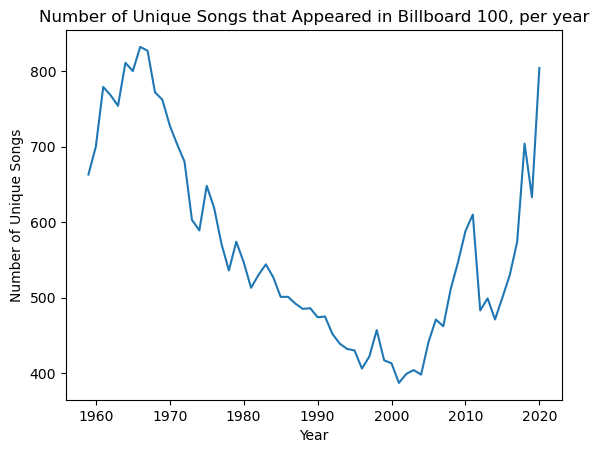

In [412]:
import matplotlib.pyplot as plt

songs_per_year = songs_per_year.sort_index()

plot(songs_per_year.index, songs_per_year.values, marker='None', linestyle='-')
xlabel('Year')
ylabel('Number of Unique Songs')
title('Number of Unique Songs that Appeared in Billboard 100, per year')
show()


**Line plot summary:** The line plot shows the number of unique songs that appeared in the Billboard 100, every year. From the period 1960 to 2000 there is a rough, downward sloping trend where the number of unique songs that appeared in the Billboard 100 started to decrease each year. At the turn of the new century (2001 and beyond) the line starts to trend upwards again, though is very jagged. By the end of our data set, in 2020, the number of unique songs starts to peak again. In other words, specific songs occupied less time in the billboard 100 in 1960 and 2020 than they did during 1990-2000.

## Part (c):

<font color=blue>
Define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

We are going to start by creating a mask that have songs with a count of ten or more:

In [419]:
ten_week_hit = grouped[grouped['count'] >= 10]
print("Number of ten-week hits:", len(ten_week_hit))

Number of ten-week hits: 14807


In [420]:
ten_week_hit[:3]

,performer,song,count
0,"""Groove"" Holmes",Misty,11
2,"""Little"" Jimmy Dickens",May The Bird Of Paradise Fly Up Your Nose,10
4,"""Weird Al"" Yankovic",Amish Paradise,16


Without adding another mask of performers with at least 30 ten week hits we have 14807 performers with a ten week hit. 

The next step is going to be value counting the performers. Since the data contains each specific song and performer as a row, with the counts above 10, I can ignore my counts and just add up the number of times the performers are listed:

In [414]:
ten_week_artists = ten_week_hit['performer'].value_counts()
ten_week_artists

Elton John                           52
Madonna                              44
Kenny Chesney                        42
Tim McGraw                           39
Keith Urban                          36
                                     ..
Jerry Vale                            1
Jerry Keller                          1
Jerry Butler & Brenda Lee Eager       1
Jermaine Jackson & Pia Zadora         1
will.i.am Featuring Justin Bieber     1
Name: performer, Length: 6126, dtype: int64

Without filtering this value_counts() list, we see that the list now shrinks to 6126, meaning that multiple artists had ten hit wonders. I am now going to select only the artists with more than 30 of these ten week hits:

In [421]:
top_ten_week_artists = ten_week_artists[ten_week_artists >= 30]
top_ten_week_artists

Elton John               52
Madonna                  44
Kenny Chesney            42
Tim McGraw               39
Keith Urban              36
Stevie Wonder            36
Taylor Swift             35
Michael Jackson          34
The Rolling Stones       33
Rod Stewart              33
Billy Joel               32
Chicago                  31
Rascal Flatts            31
Drake                    31
Jason Aldean             30
George Strait            30
Brad Paisley             30
Neil Diamond             30
Daryl Hall John Oates    30
Name: performer, dtype: int64

To check that I have the right number of artists (I should have 19), I am going to print the length of the new dataframe:

In [422]:
print("Artists who had 30 or more 10 week hits:", len(ten_week_artists_filtered))

Artists who had 30 or more 10 week hits: 19


Text(0, 0.5, 'Number of 10-week hit songs')

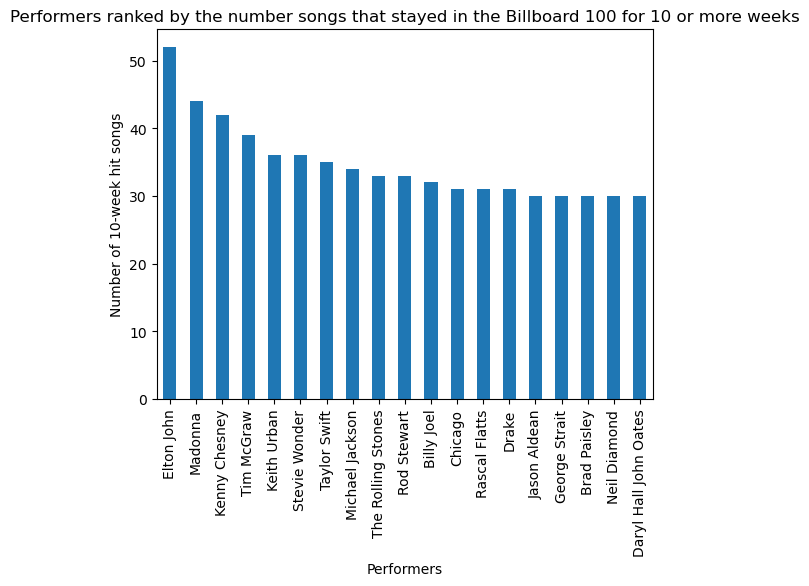

In [426]:
top_ten_week_artists.plot(kind = 'bar')
title("Performers ranked by the number songs that stayed in the Billboard 100 for 10 or more weeks")
xlabel("Performers")
ylabel("Number of 10-week hit songs")

**Bar plot summary:** This bar chart shows the 19 performers who have 30 or more songs which have all been in the Billboard 100 for at least ten weeks (during 1958-2021*). The names are ranked in descending order, with Elton John having the most songs that hit this criteria. The last five artists have exactly 30 songs that are ten-week hits.

**NB: 1958 and 2021 are not measured as whole years*

*As a way of checking my work for this question I have used the entire dataset, and focused on weeks_on_chart. weeks_on_chart is not a variable that is of interest in the question specifically, but can be used to find the same answers:*

In [429]:
#To save space and avoid confusion the code for checking the question is all in the same block.

#QUESTION 1:
#Creating a table with performer, song, and weeks on chart:
#Taking only the max value of weeks on chart and dropping the rest
checker_billboard = imported_billboard.groupby(['performer', 'song'], as_index=False)['weeks_on_chart'].max()
checker_billboard[:2]

checker_popularity = checker_billboard.sort_values(by='weeks_on_chart', ascending=False)
checker_popularity[:10]


#QUESTION 3:
#Creating a mask for hits that were on billboard for ten or more weeks
checker_ten_week_hit = checker_billboard[checker_billboard['weeks_on_chart'] >= 10]
checker_ten_week_hit[:3]

#Value Counting for performers to get how many hits they have 
filtered_again = ten_week_hit1['performer'].value_counts()
ten_week_artists_filtered = filtered_again[filtered_again >= 30]
#Finding the length to confirm we have 19 artists
print("Checking the number of 30 10-week hit artists:",len(ten_week_artists_filtered))

Checking the number of 30 10-week hit artists: 19


# Visual story telling part 1: green buildings


<font color=blue>
    
Will investing in a green building be worth it, from an economic perspective? The baseline construction costs are $100 million, with a 5% expected premium for green certification.

In [134]:
greenbuildings = pd.read_csv('greenbuildings.csv')
greenbuildings[:3]

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [272]:
buildings = greenbuildings[['CS_PropertyID', 'Rent', 'leasing_rate', 'stories', 'age', 'green_rating', 'Gas_Costs', 'Electricity_Costs']]

buildings[:5]

buildings['Total_Costs'] = buildings['Gas_Costs'] + buildings['Electricity_Costs']
buildings[:2]


,CS_PropertyID,Rent,leasing_rate,stories,age,green_rating,Gas_Costs,Electricity_Costs,Total_Costs
0,379105,38.56,91.39,14,16,1,0.013700,0.029000,0.042700
1,122151,28.57,87.14,5,27,0,0.013731,0.029045,0.042776


In [176]:
green_building = buildings[buildings['green_rating'] == 1]
not_green_building = buildings[buildings['green_rating'] == 0]

In [179]:
buildings.corr()

,CS_PropertyID,Rent,leasing_rate,stories,age,green_rating,Gas_Costs,Electricity_Costs,Total_Costs
CS_PropertyID,1.000000,-0.154618,-0.130160,-0.091558,0.014437,-0.022379,0.239523,0.034441,0.092523
Rent,-0.154618,1.000000,0.179068,0.116111,-0.102664,0.032666,0.000621,0.391659,0.355501
leasing_rate,-0.130160,0.179068,1.000000,0.207707,-0.123674,0.096251,0.021810,0.046626,0.047883
stories,-0.091558,0.116111,0.207707,1.000000,-0.145022,0.043791,0.056040,-0.093030,-0.070068
age,0.014437,-0.102664,-0.123674,-0.145022,1.000000,-0.224051,-0.054667,-0.058857,-0.067385
green_rating,-0.022379,0.032666,0.096251,0.043791,-0.224051,1.000000,-0.030859,0.022507,0.012526
Gas_Costs,0.239523,0.000621,0.021810,0.056040,-0.054667,-0.030859,1.000000,0.239986,0.473559
Electricity_Costs,0.034441,0.391659,0.046626,-0.093030,-0.058857,0.022507,0.239986,1.000000,0.968671
Total_Costs,0.092523,0.355501,0.047883,-0.070068,-0.067385,0.012526,0.473559,0.968671,1.000000


# Visual story telling part 2: Capital Metro data


<font color=blue>
Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.
<br>
    
You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

To start I am going to view my data and make some additional columns and changes. This is not part of the visualization/stories.

In [652]:
#Reading the file and viewing the first few rows:
metro = pd.read_csv('capmetro_UT.csv')
metro[:2]

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend


After looking at this data I want to separate the timestamp with date and time in different columns.

*I will keep the timestamp column in case I need it later down the line.*

In [654]:
metro['timestamp'] = pd.to_datetime(metro['timestamp'])
metro['date'] = metro['timestamp'].dt.date
metro['time'] = metro['timestamp'].dt.time
metro['minutes'] = metro['timestamp'].dt.minute
metro[:2]

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend,date,time,minutes
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend,2018-09-01,06:00:00,0
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend,2018-09-01,06:15:00,15


I also want to rename the weekend column to weekend_weekday as it is confusing right now naming the column as one of the response answers.

In [655]:
metro.rename(columns={'weekend': 'weekend_weekday'}, inplace=True)

I want to see the difference between people getting on and off the metro as this may be useful. Below I have added another column, 'board_alight_difference', which is just boarding minus alighting. Positive values mean more people boarded the metro than got off, vice versa for negative. A 0 value means the same number of people got on/off.

In [656]:
metro['board_alight_difference'] = metro['boarding'] - metro['alighting']
metro[:2]

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend_weekday,date,time,minutes,board_alight_difference
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend,2018-09-01,06:00:00,0,-1
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend,2018-09-01,06:15:00,15,1


Next I am just going to look at a summary statistics table to get a better idea of what I am looking at:
- The SD for both boarding and alighting is fairly high, meaning there are heavy fluctuations in who is getting on and off each day
- The temperature range is very drastic, with temperatures dropping to 29F, so this is something I want to look at
- The max. hour is 9 and the min. hour is 6 so I assume the metro hours of operation are 6am-10pm


In [657]:
metro.describe()

,boarding,alighting,temperature,hour_of_day,minutes,board_alight_difference
count,5824.000000,5824.000000,5824.000000,5824.000000,5824.00000,5824.000000
mean,51.511676,47.646291,69.282473,13.500000,22.50000,3.865385
std,48.820284,50.069866,13.540249,4.610168,16.77195,65.594585
min,0.000000,0.000000,29.180000,6.000000,0.00000,-278.000000
25%,13.000000,13.000000,59.195000,9.750000,11.25000,-13.000000
50%,33.000000,28.000000,72.750000,13.500000,22.50000,3.000000
75%,79.250000,64.000000,79.290000,17.250000,33.75000,42.000000
max,288.000000,304.000000,97.640000,21.000000,45.00000,221.000000


**Visual Story 1: Do People Really Work a 9-5 job?**
<br>
It is no secret that Austin is difficult city to drive through, with expensive parking costs! With this in mind, I wanted to see if the Metro bus is essential to commuters, going to College or working at the UT Campus. While the data does not reveal the type of people using the Metro Bus service explicity, I feel as though it is safe to assume that most of these users are commuters for work/college. With that, I ask the question of whether these people are actually commuters, and if they are working/studying during the typical 9am-5pm time frame. 

In order to find this out I have created two bar charts:

**Bar Chart 1** looks at the number of people boarding (i.e. leaving campus) the Metro per hour, but splits the data into weekdays and weekends. The trend shows us that the usage on weekends does not fluctate like it does during the week. In fact, on weekends, usage remains at a very low level from the hours of 10am-7pm. Any hours outside of this on the weekend are virtually non existent. On the other hand, the boarding levels for a week day center around 3-5pm, revealing that most people are leaving campus around this time. This chart cements my assumption of commuters, with most workers/students not working/in school on the weekends.


**Bar Chart 2** looks at the number of people boarding and alighting, on average, every hour of the day. Since the previous bar chart showed no severe fluctuations in the weekend data I have applied the boarding/alighting mean hourly values to the whole data set, irrespective of the day. This bar chart shows us that most people are using the Metro and getting off on campus at around 8-10am, and most leave around 3-5pm. Of course, we do not know for sure if the individuals who are alighting in the peak alighting times are the same individuals who are boarding during the peak boarding times. Notwithstanding, is does seem safe to create the story that people truly are working a 9-5 (or at least a 9-4)!

*For the purpose of this paper students are considered to be working. 

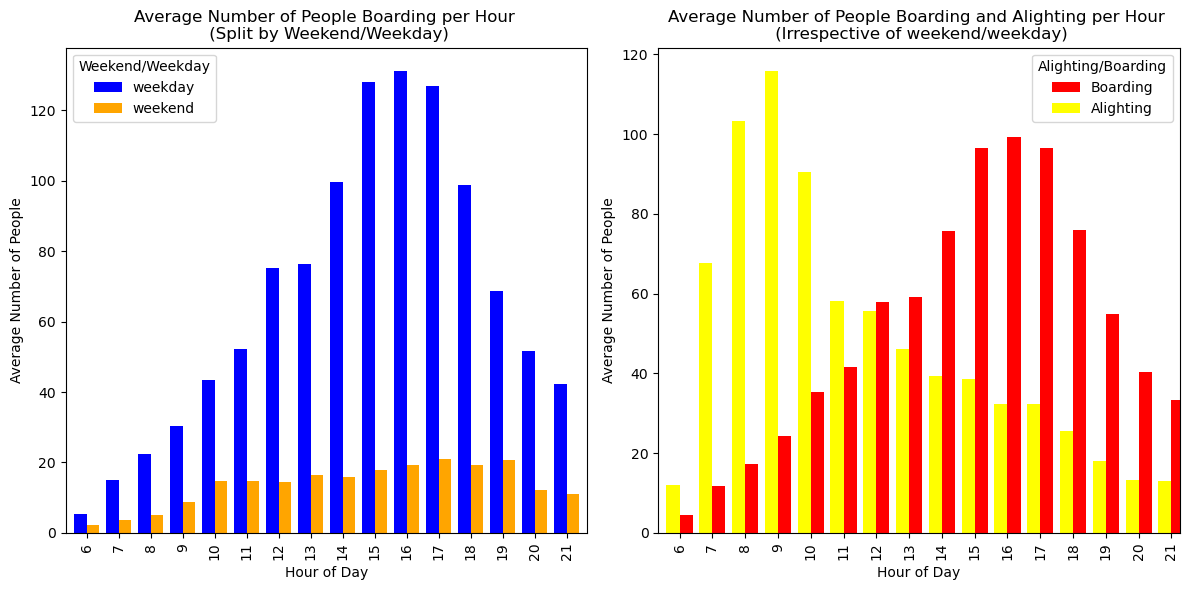

In [679]:
#Plot 1:
grouped_boarding = metro.groupby(['hour_of_day', 'weekend_weekday'])['boarding'].mean()
colors = {'weekend': 'orange', 'weekday': 'blue'}

#Creating a line of code that puts my plots side by side:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  

#Subplot 1:
grouped_boarding.unstack('weekend_weekday').plot(kind='bar', width=0.8, color=colors, ax=ax[0])
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Average Number of People')
ax[0].set_title('Average Number of People Boarding per Hour \n (Split by Weekend/Weekday)')
ax[0].legend(title='Weekend/Weekday')

# Plot 2 - Average Number of People Boarding and Alighting per Hour
grouped_boarding = metro.groupby(['hour_of_day'])['boarding'].mean()
grouped_alighting = metro.groupby(['hour_of_day'])['alighting'].mean()

grouped_boarding.plot(kind='bar', width=0.4, color='red', position=0, label='Boarding', ax=ax[1])
grouped_alighting.plot(kind='bar', width=0.4, color='yellow', position=1, label='Alighting', ax=ax[1])
ax[1].set_xlabel('Hour of Day')
ax[1].set_ylabel('Average Number of People')
ax[1].set_title('Average Number of People Boarding and Alighting per Hour \n (Irrespective of weekend/weekday)')
ax[1].legend(title='Alighting/Boarding')


tight_layout()
show()


In [676]:
#Creating a new subset for my next story:
weekday_subset = metro[metro['weekend_weekday'] == 'weekday']
weekday_subset[:3]

dated_weekday = weekday_subset.groupby(['date'])['boarding', 'alighting'].agg('mean')
dated_weekday[:2]


dated_weekday.reset_index(inplace=True)
dated_weekday.index.name = 'New Index'
dated_weekday[:3]

,date,boarding,alighting
New Index,,,
0,2018-09-03,12.281250,11.750000
1,2018-09-04,76.296875,71.484375
2,2018-09-05,76.812500,70.734375


**Visual Story 2: Do National Holidays Really Affect Campus?**
<br>
Something I noticed about our cohort is how many international students there are! With that in mind I wanted to see if National, U.S. Holidays drastically affect the Metro ridership. With Sept/Oct/Nov in our data set, Thanksgiving is included, and yet this is a holiday that many UT Students do not celebrate (since it is an American Holiday).

In order to see if holidays do affect campus, despite a large international student body, I have created 2 scatterplots. These scatterplots look at the weekday ridership (since the National Holidays in 2018 fell on weekdays, and ridership on weekends were too low) by dates, and plots the mean boarding and alighting levels. I have implemented another layer in the code that gives the specific dates of points that are obvious outliers. 

The dates for both boarding and alighting match! Moreover, these dates are National Holidays! 09/03/2018 was Labor Day, and 11/21/2018-11/23/2018 was the Thanksgiving break. So, while our UT does have many international students, they, along with everyone else, are taking advantage of the holidays and avoiding going into campus! *(Though the Metro may have been out of service on the actual Thanksgiving Day...)*

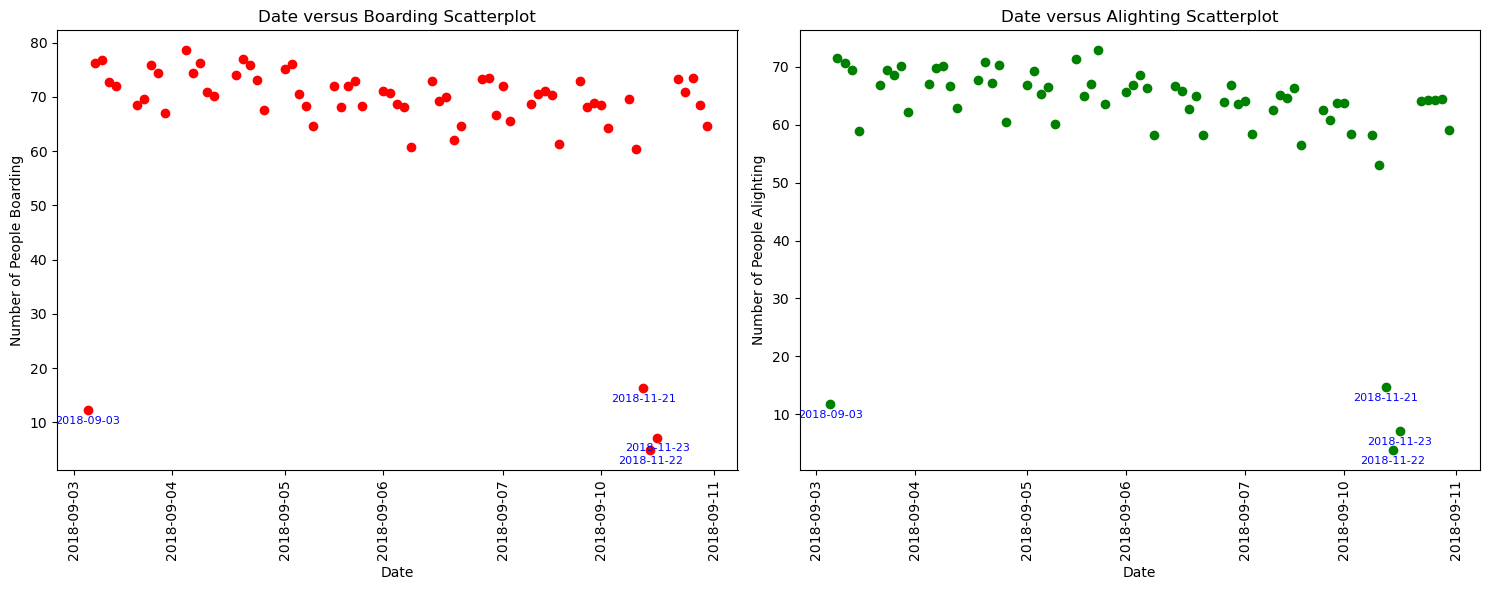

In [674]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#First subplot:
axs[0].scatter(dated_weekday['date'], dated_weekday['boarding'], marker='o', color='red', label='Boarding', linestyle='None')

axs[0].set_xlabel("Date")
axs[0].set_ylabel("Number of People Boarding")
axs[0].set_title("Date versus Boarding Scatterplot")

#Rotate the x-axis labels
axs[0].set_xticklabels(dated_weekday['date'], rotation=90, ha='center')

#Label outlier points:
for date, boarding in zip(dated_weekday['date'], dated_weekday['boarding']):
    if boarding < 30:
        axs[0].annotate(f"{date}", xy=(date, boarding), xytext=(0, -10), textcoords='offset points', ha='center', color='blue', fontsize=8)

#Second: Number of People Alighting
axs[1].scatter(dated_weekday['date'], dated_weekday['alighting'], marker='o', color='green', label='Alighting', linestyle='None')

axs[1].set_xlabel("Date")
axs[1].set_ylabel("Number of People Alighting")
axs[1].set_title("Date versus Alighting Scatterplot")

#Rotate the x-axis labels
axs[1].set_xticklabels(dated_weekday['date'], rotation=90, ha='center')

#Label outlier points:
for date, alighting in zip(dated_weekday['date'], dated_weekday['alighting']):
    if alighting < 30:
        axs[1].annotate(f"{date}", xy=(date, alighting), xytext=(0, -10), textcoords='offset points', ha='center', color='blue', fontsize=8)

plt.tight_layout()
plt.show()
